In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df= pd.read_excel(r'C:\data\breast cancer detection.xlsx')

In [3]:
print("First five rows:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nStatistics:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())


First five rows:
         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33

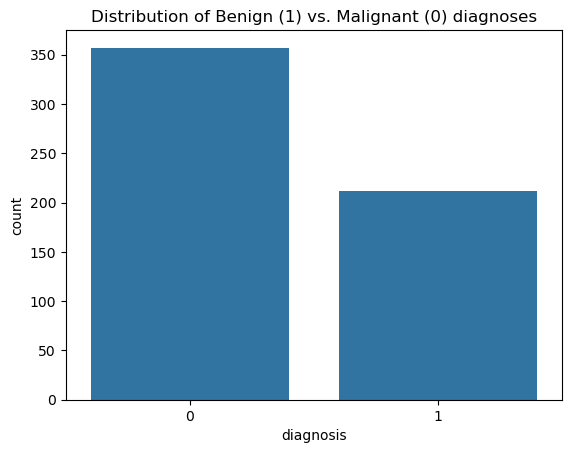

In [5]:
# Target distribution

if 'diagnosis' in df.columns:
    sns.countplot(x='diagnosis', data=df)
    plt.title('Distribution of Benign (1) vs. Malignant (0) diagnoses')
    plt.show()


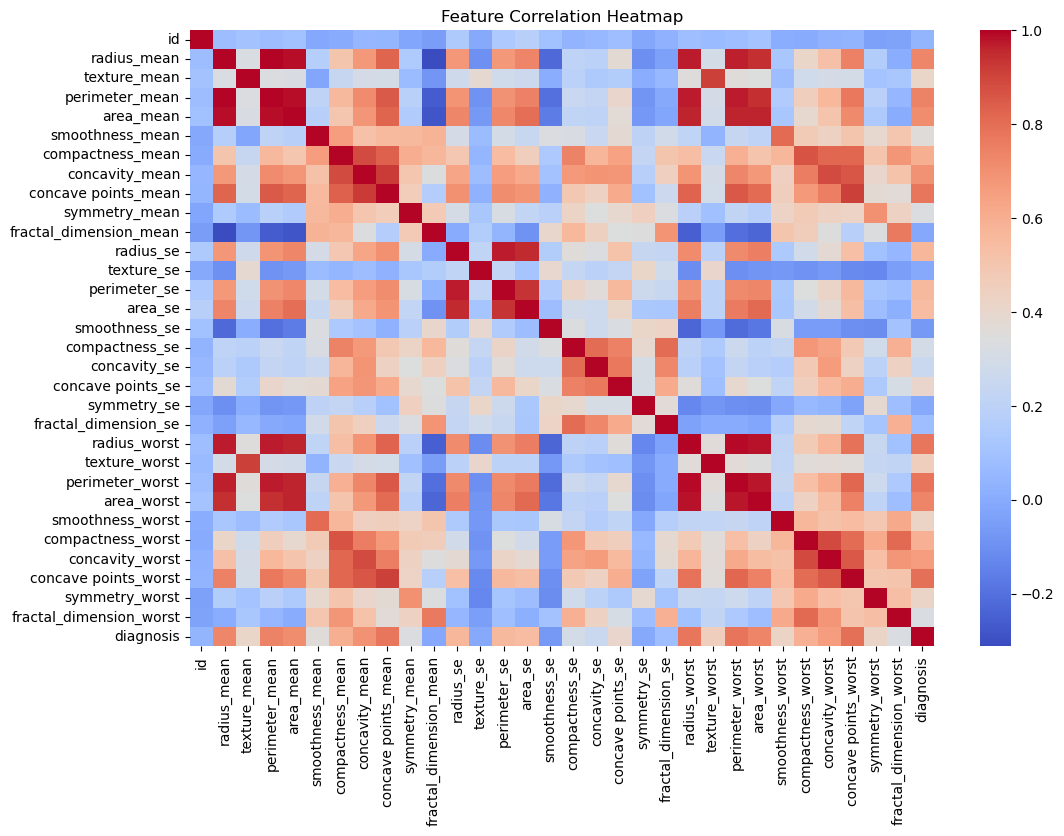

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


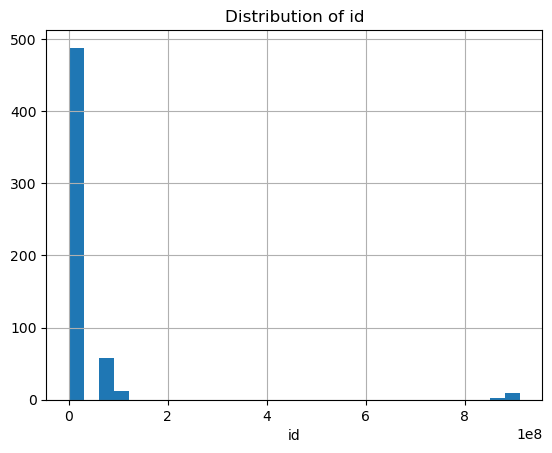

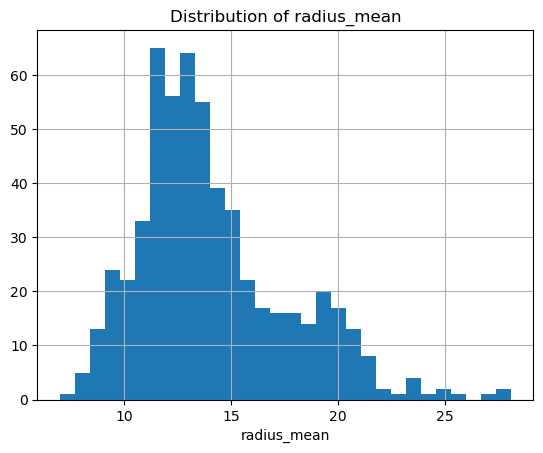

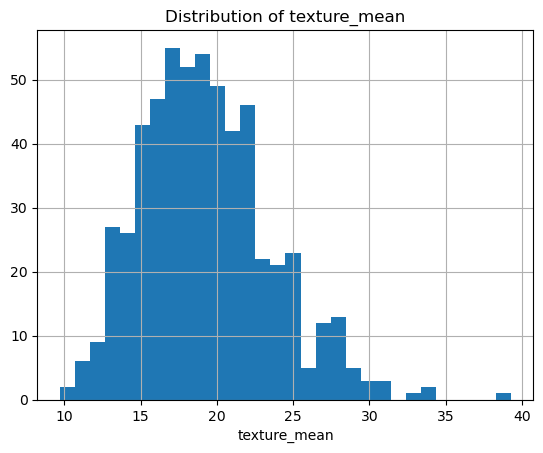

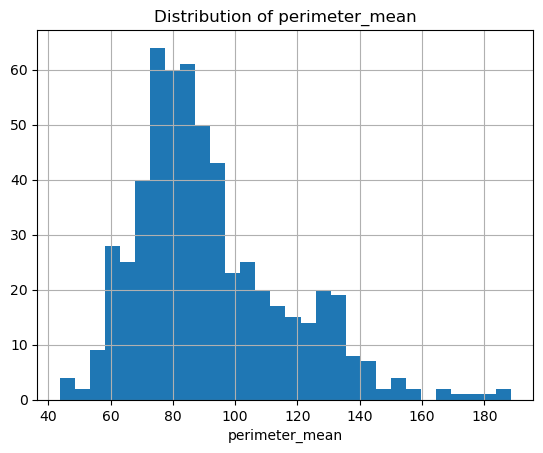

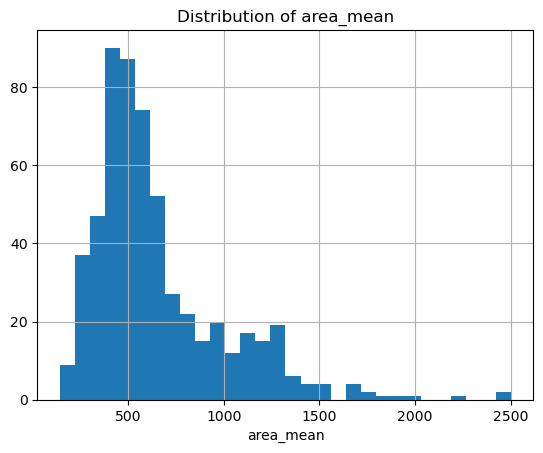

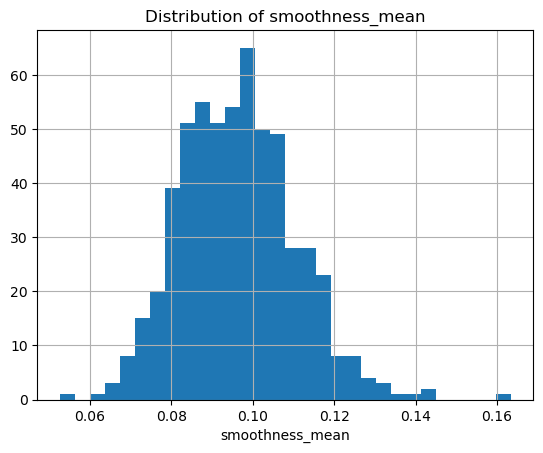

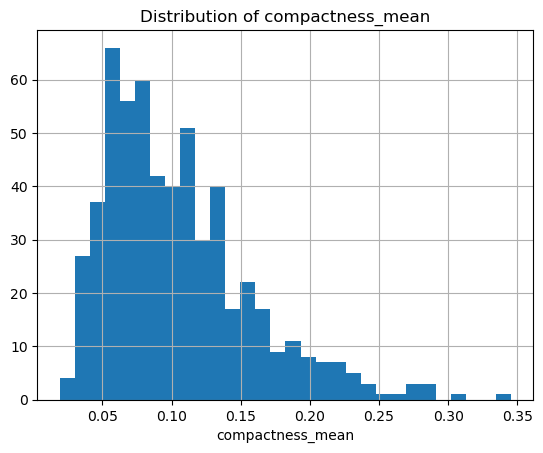

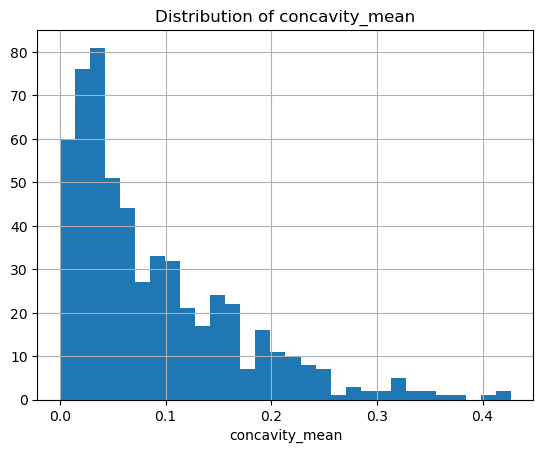

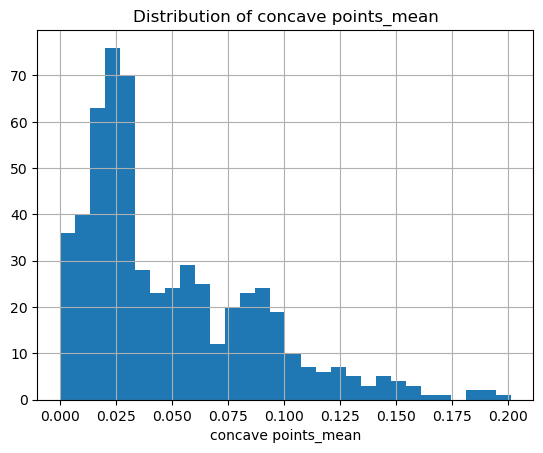

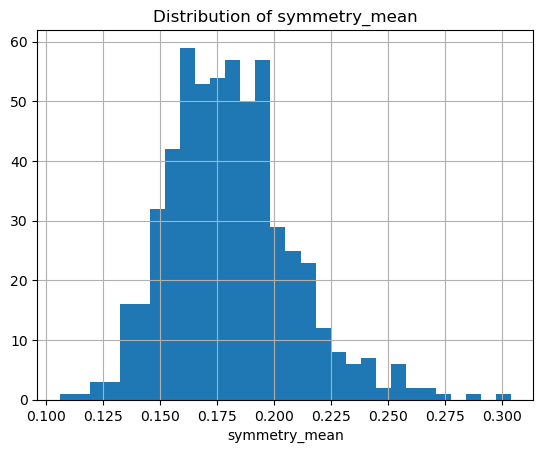

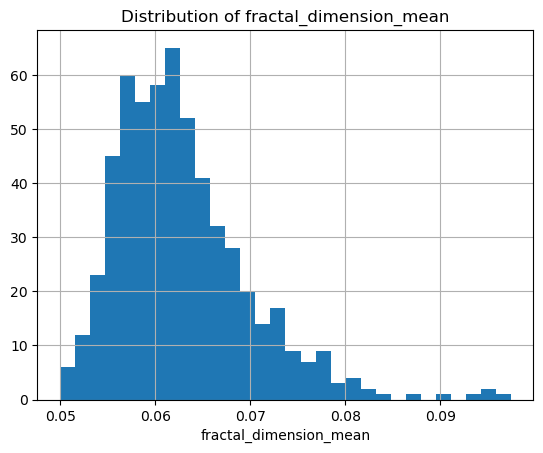

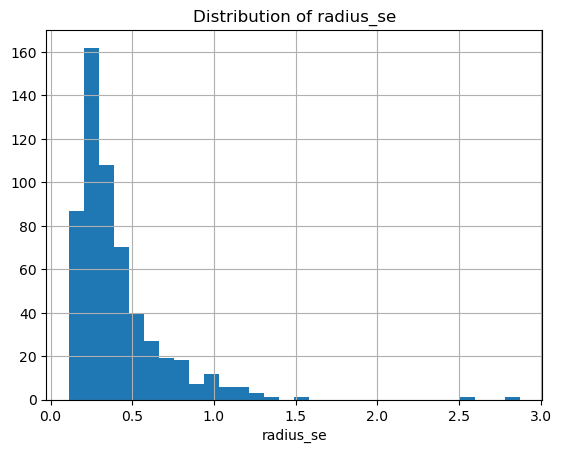

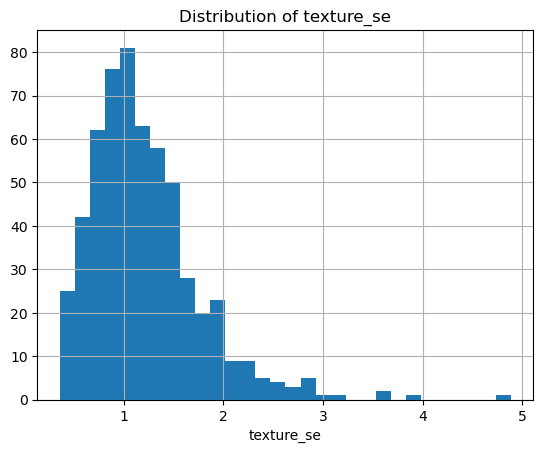

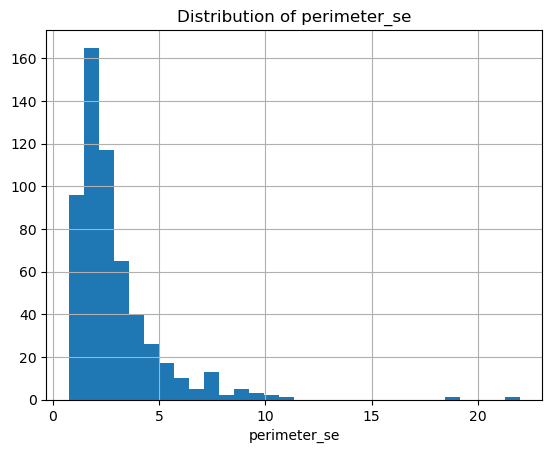

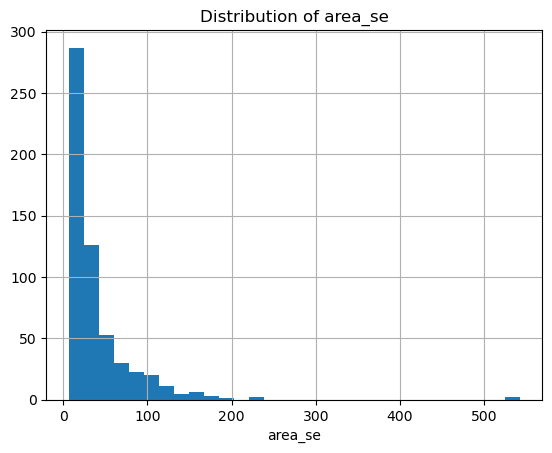

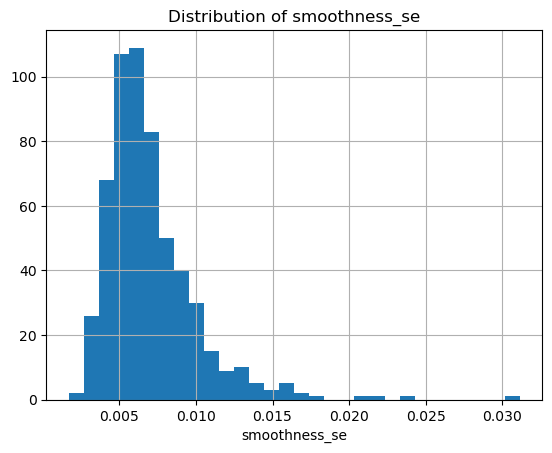

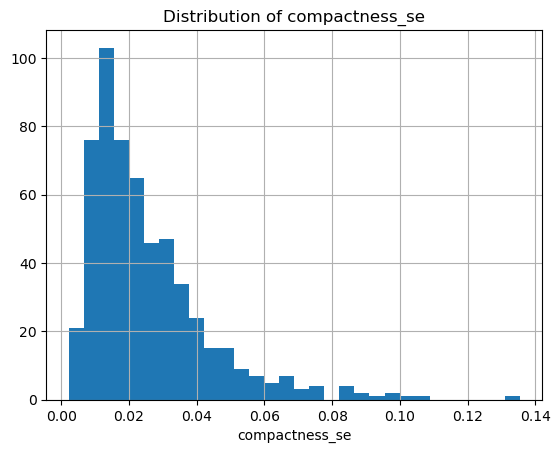

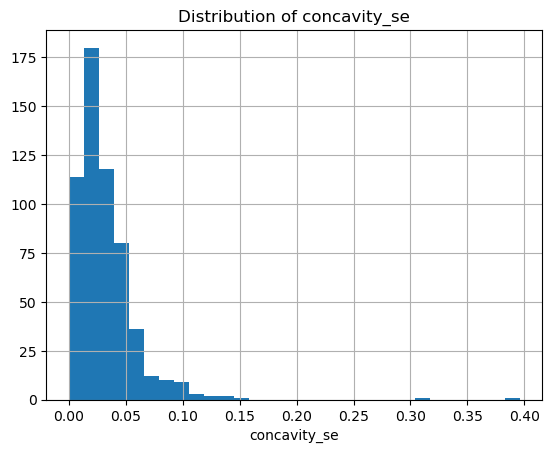

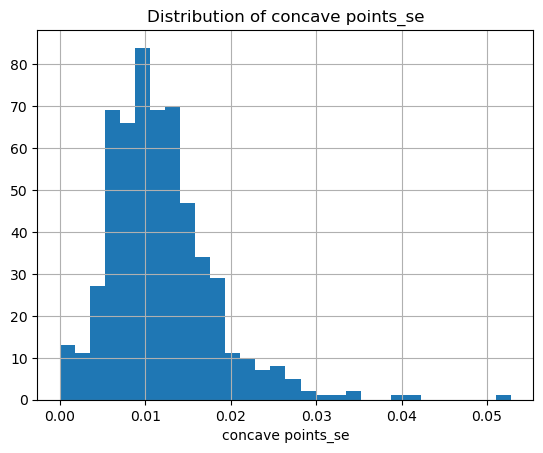

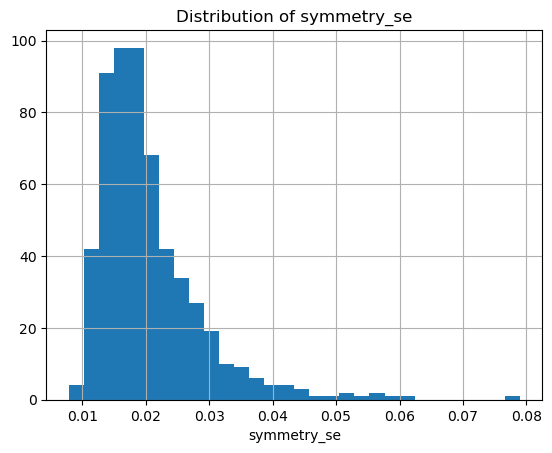

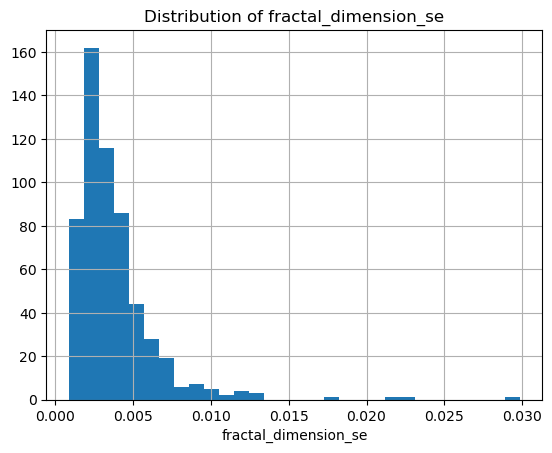

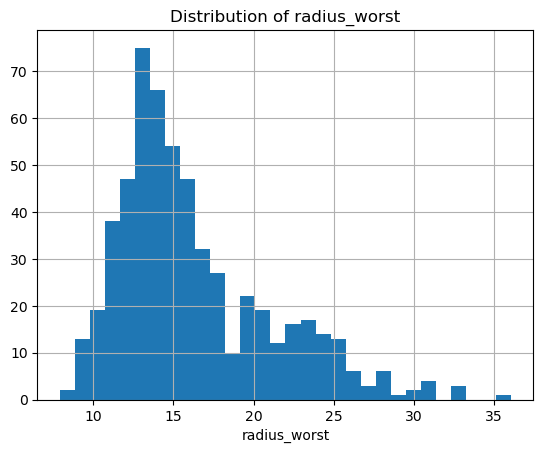

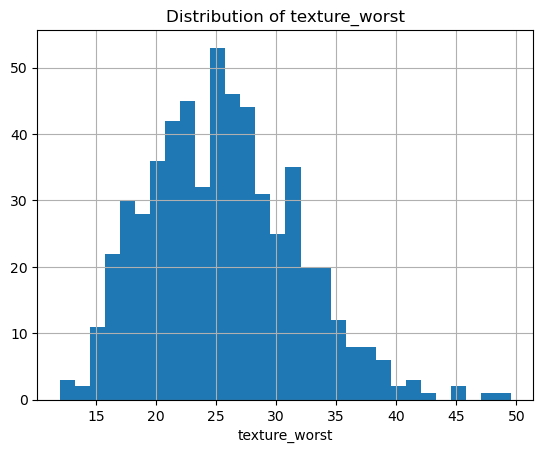

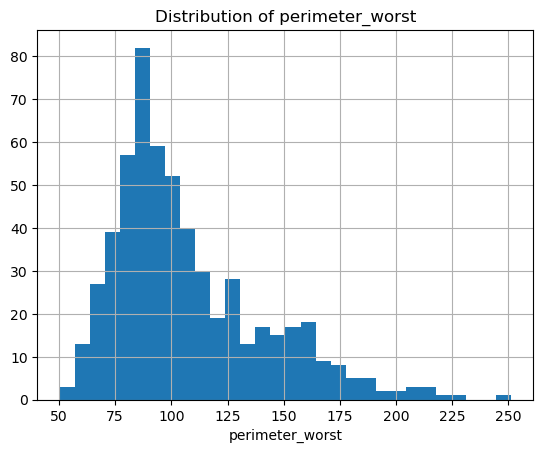

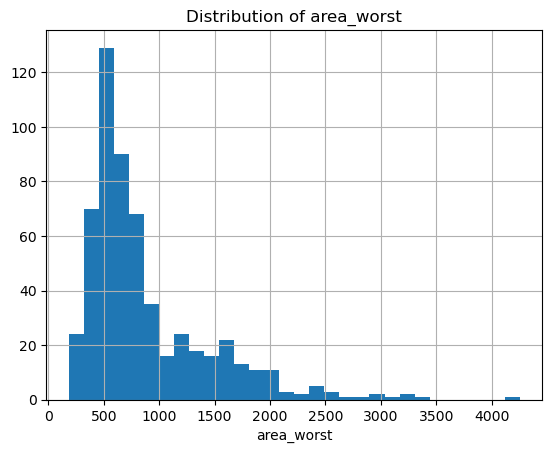

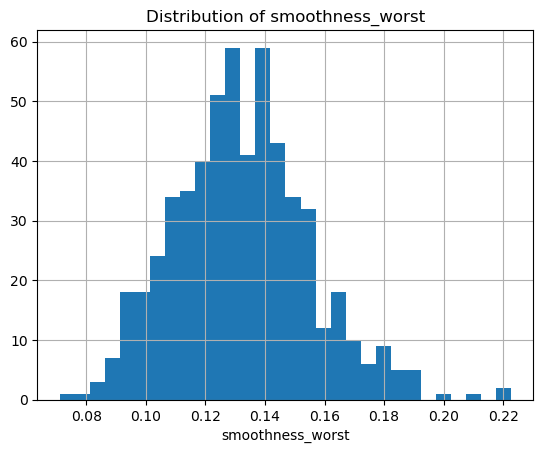

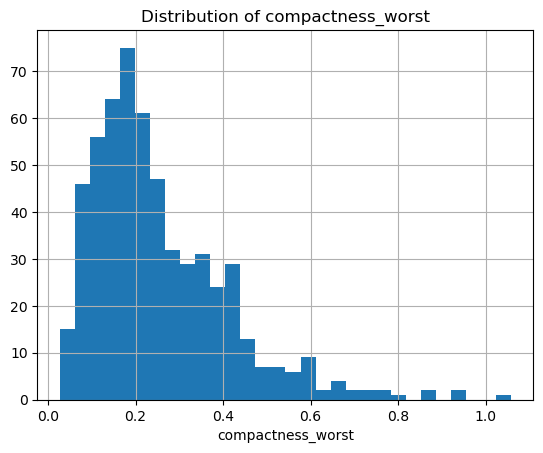

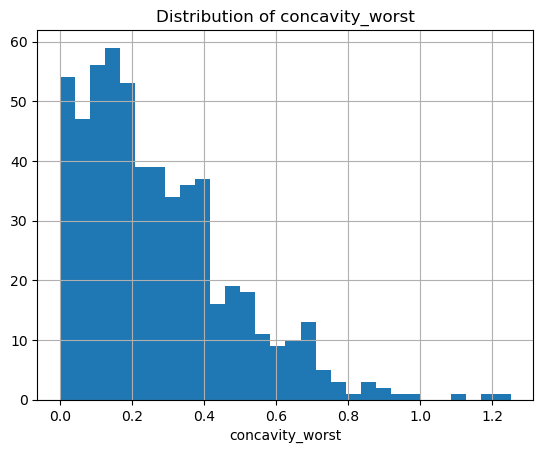

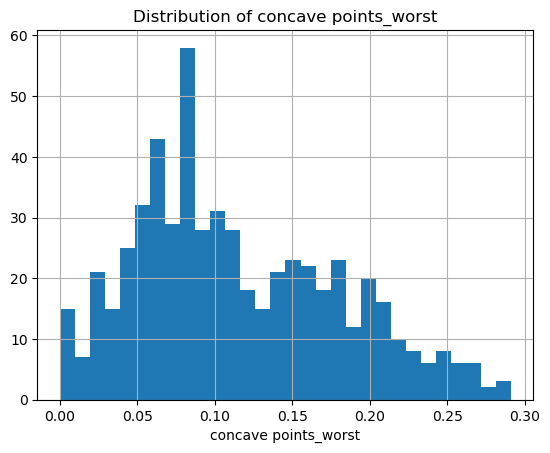

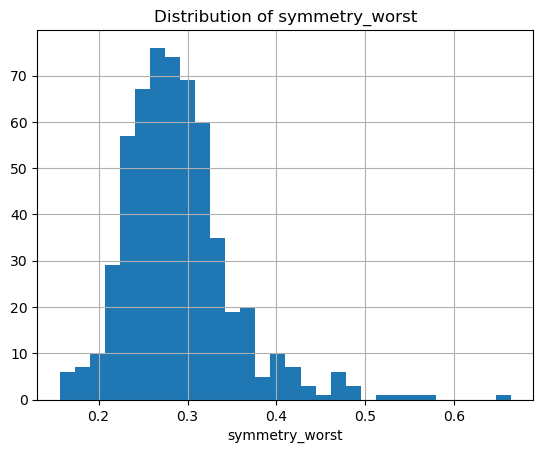

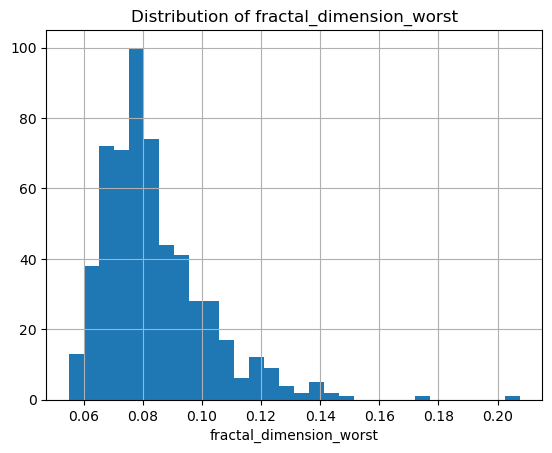

In [7]:
# Numeric feature distributions
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_features:
    if col != 'diagnosis':
        plt.figure()
        df[col].hist(bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.show()

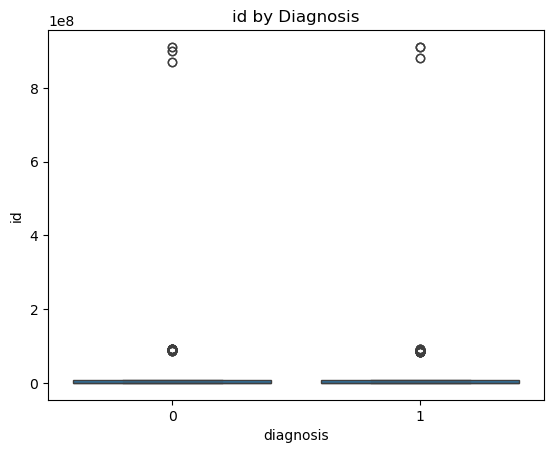

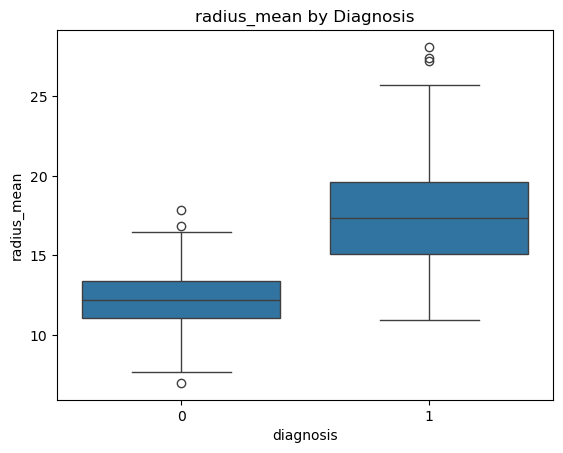

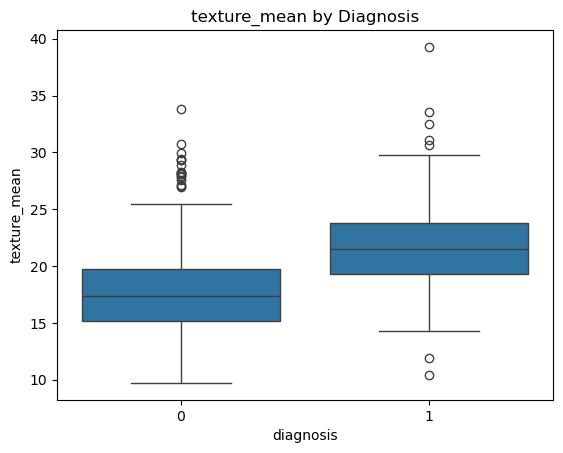

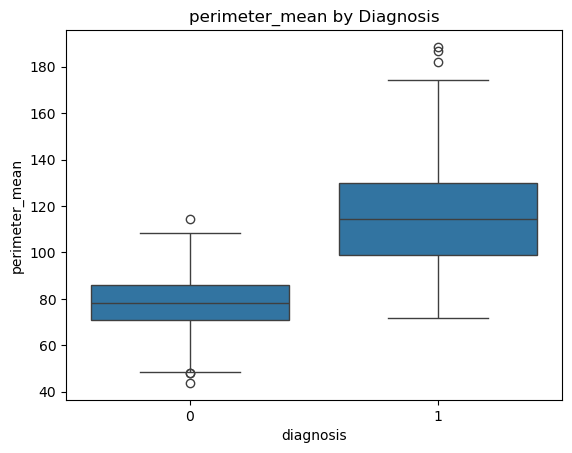

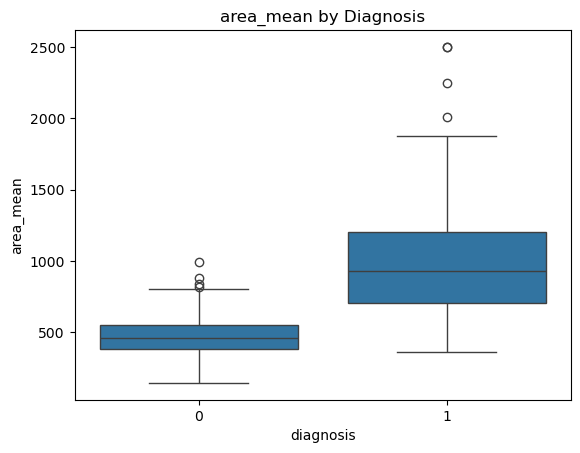

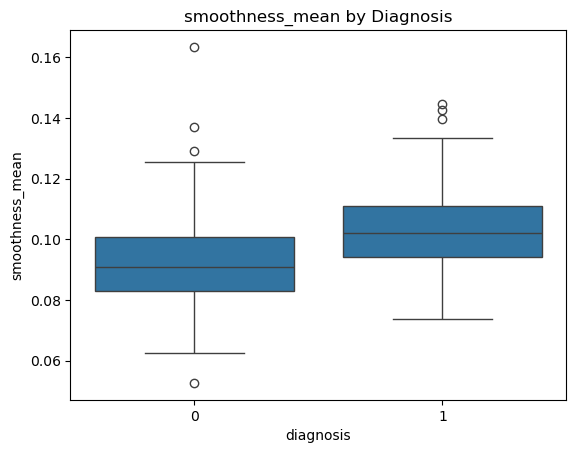

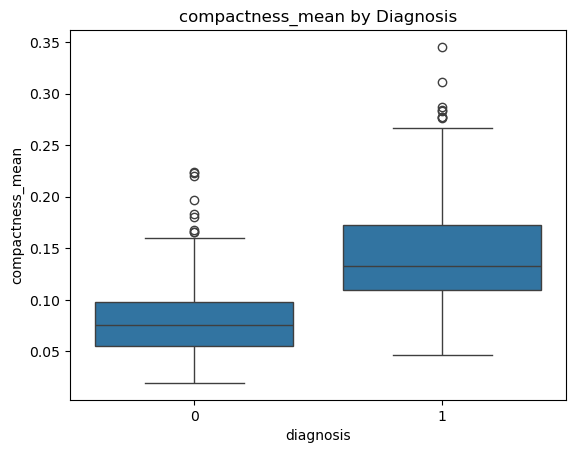

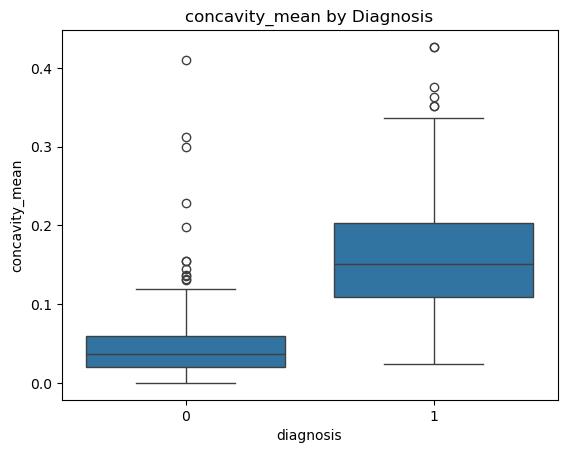

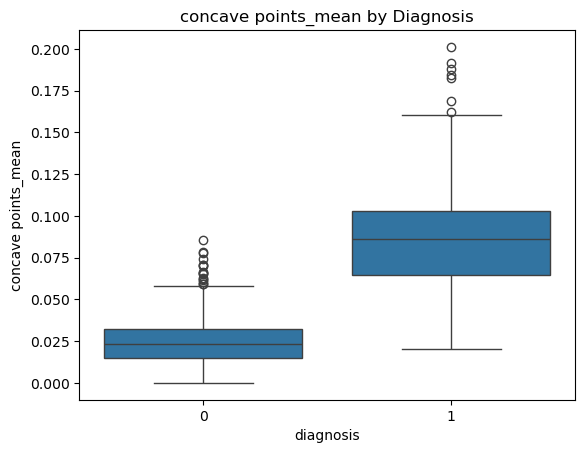

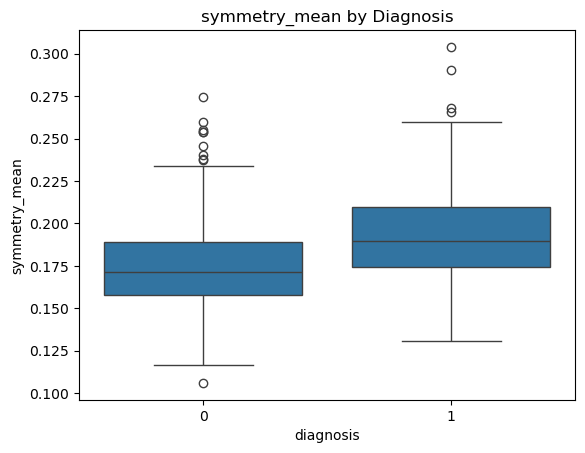

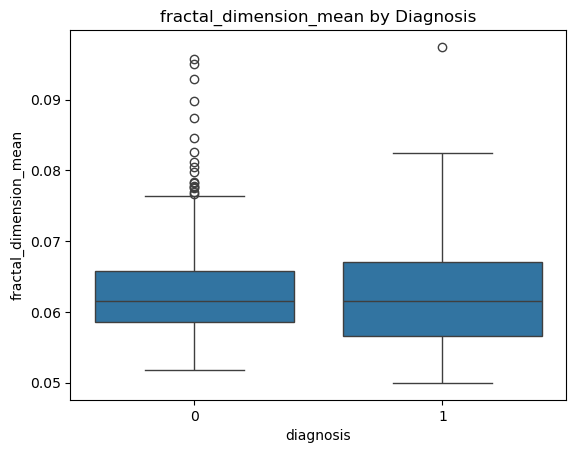

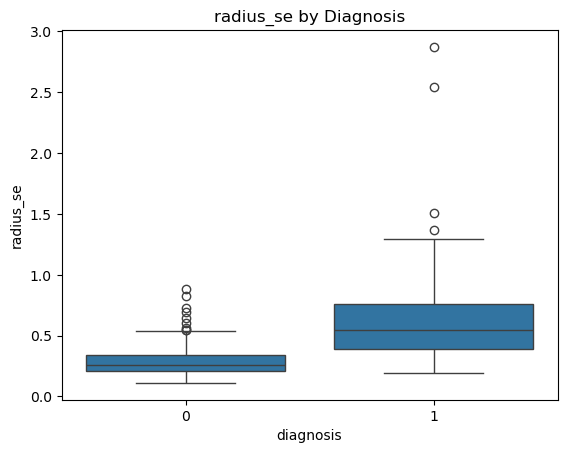

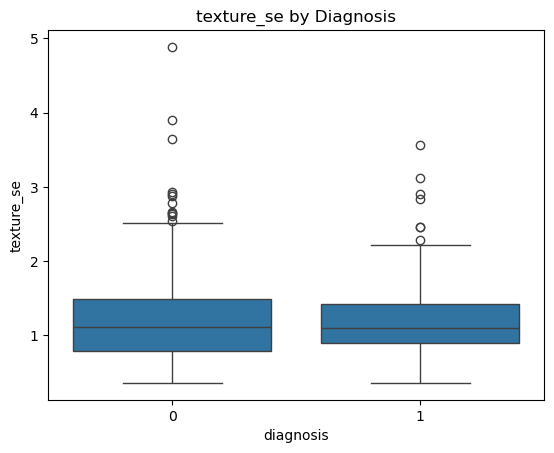

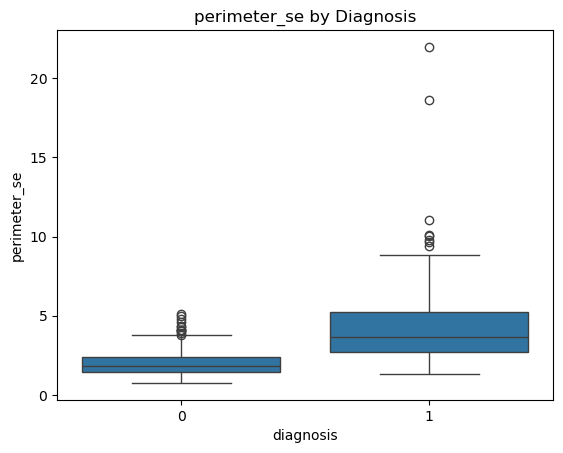

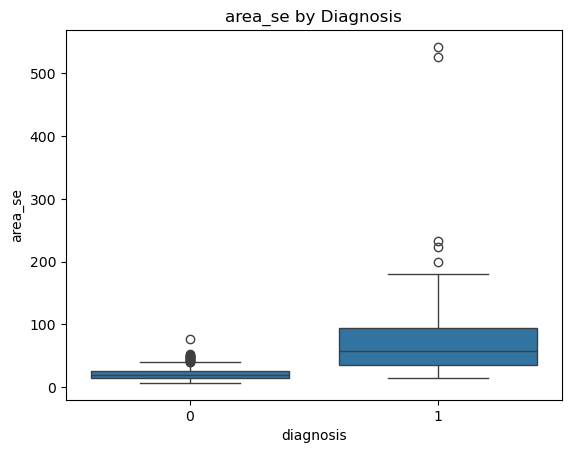

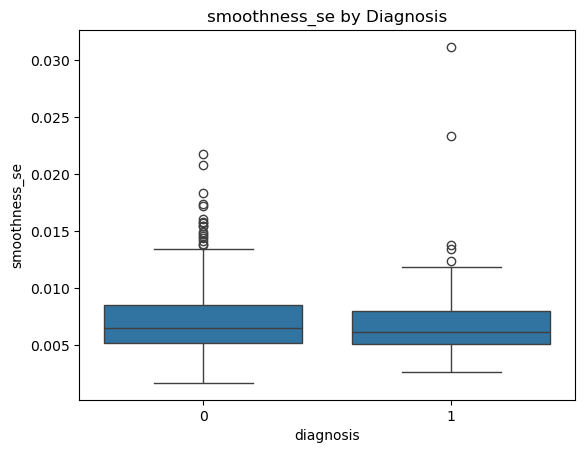

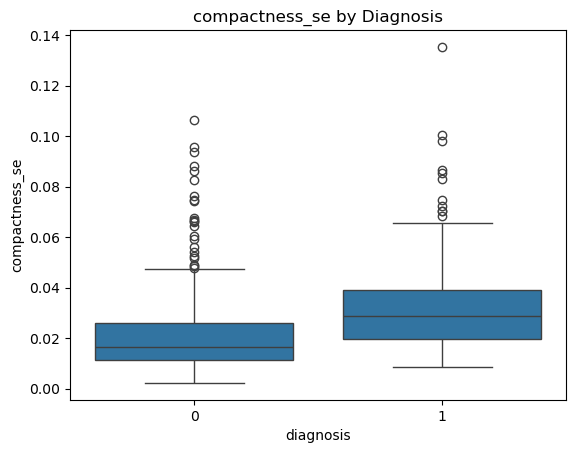

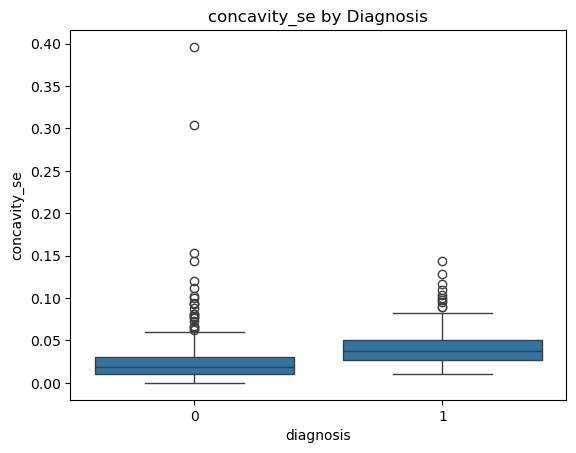

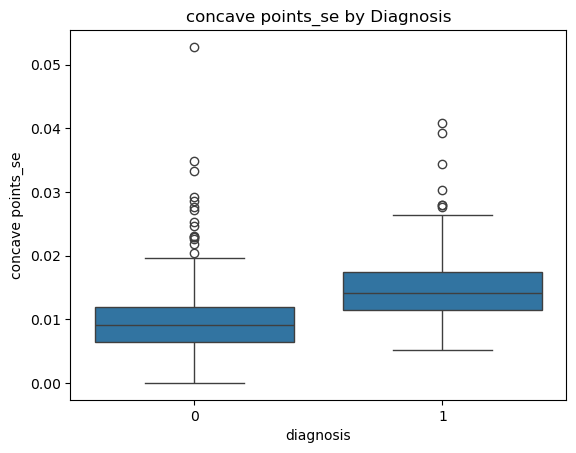

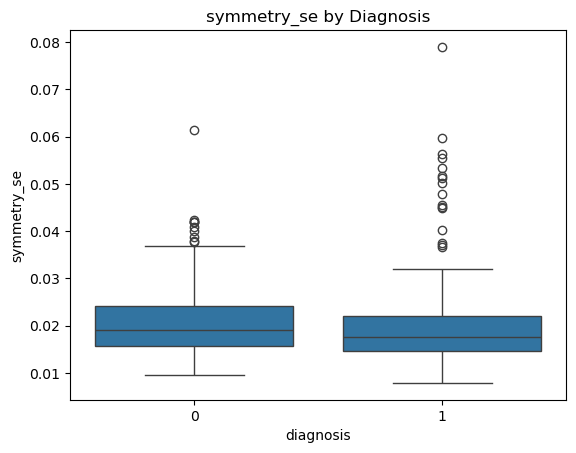

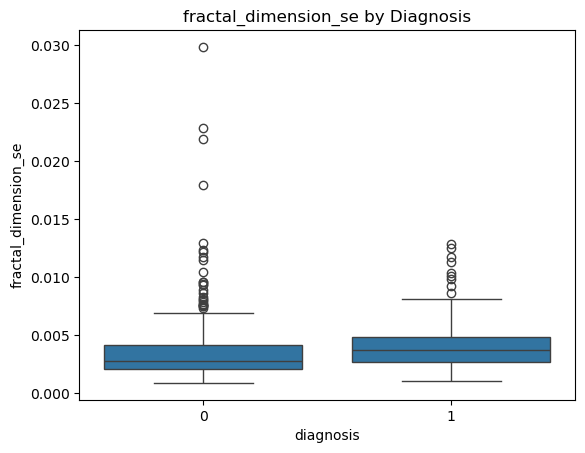

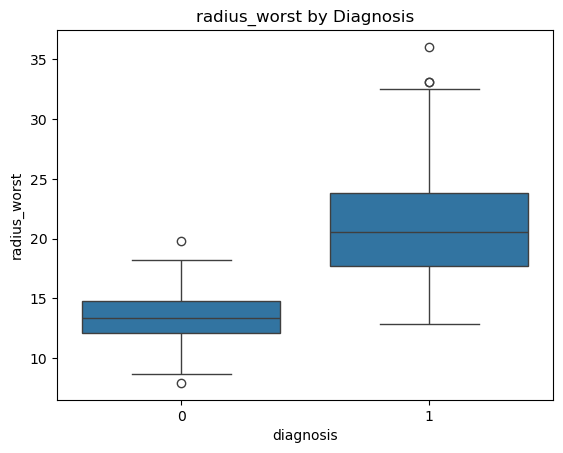

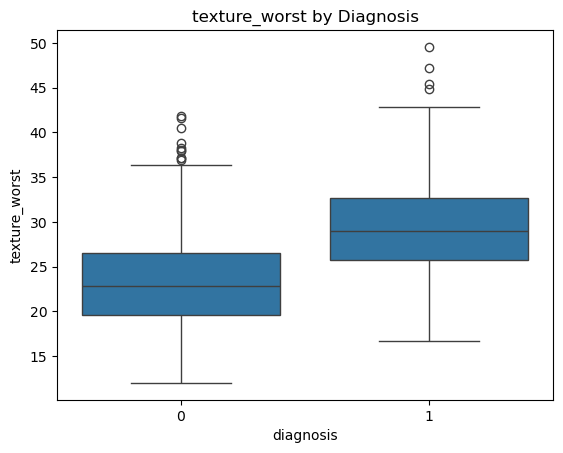

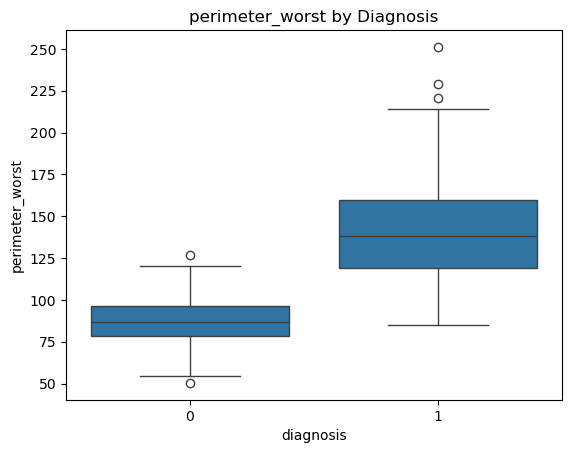

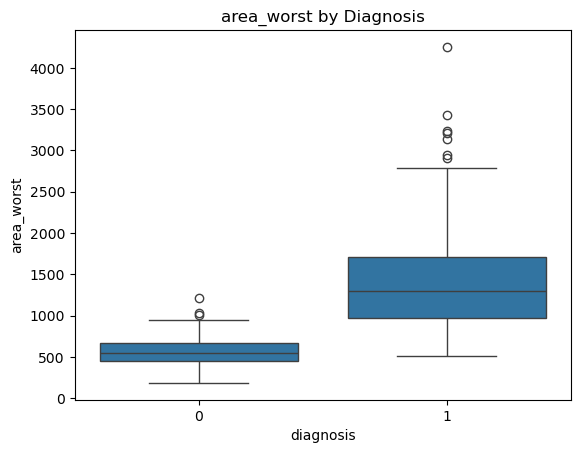

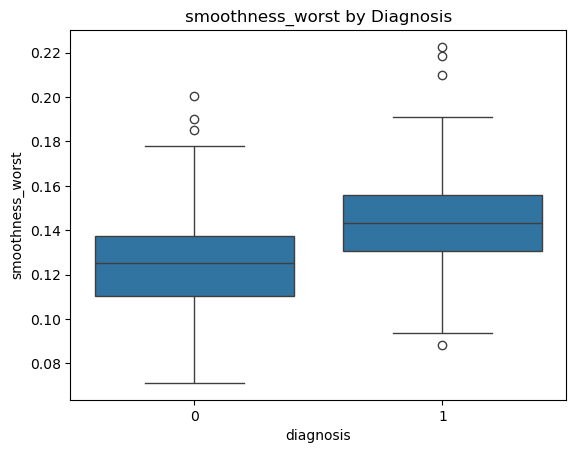

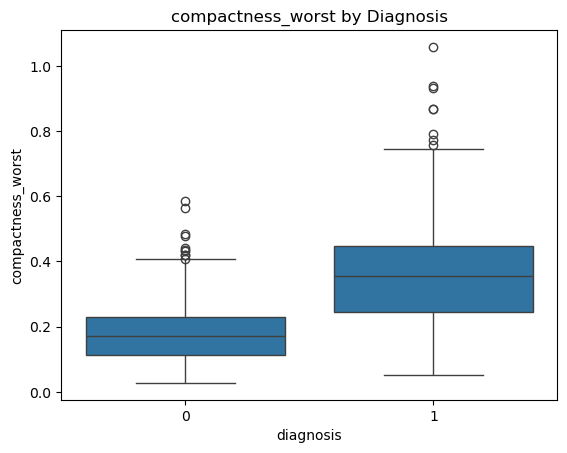

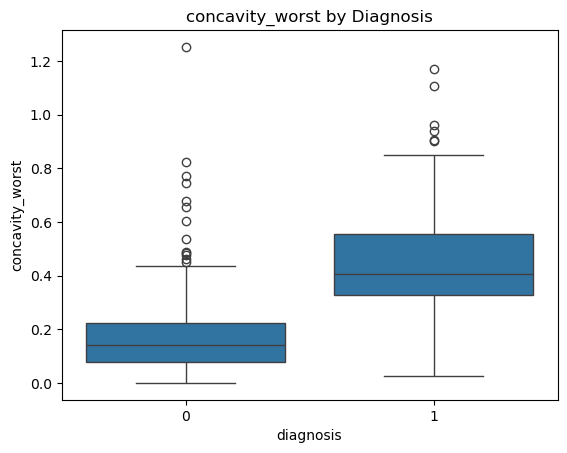

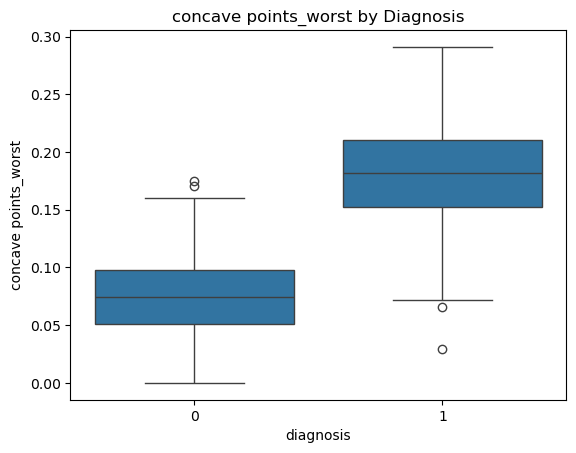

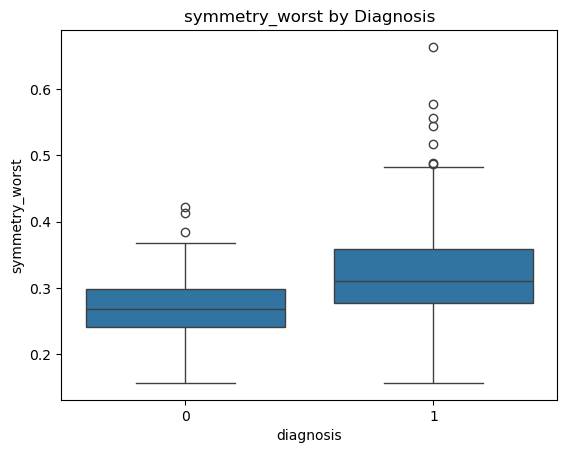

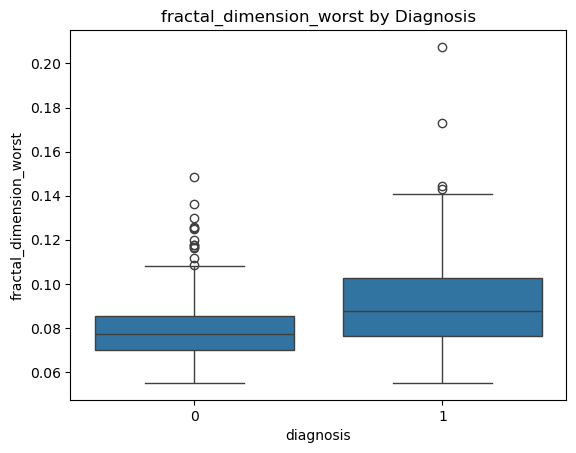

In [8]:
# Boxplot (example for outlier visualization)
for col in numeric_features:
    if col != 'diagnosis':
        plt.figure()
        sns.boxplot(x='diagnosis', y=col, data=df)
        plt.title(f"{col} by Diagnosis")
        plt.show()


In [9]:
df = df.dropna()

In [11]:
if 'diagnosis' in df.columns and df['diagnosis'].dtype == 'O':
    df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

for col in df.select_dtypes(include='object').columns:
    if col != 'diagnosis':
        df[col] = LabelEncoder().fit_transform(df[col])

In [12]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [13]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [16]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)


In [17]:
# Random Forest
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred_rforest = rforest.predict(X_test)

In [18]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rforest))

Logistic Regression Accuracy: 0.9736842105263158
Decision Tree Accuracy: 0.9385964912280702
Random Forest Accuracy: 0.9649122807017544


In [23]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("\nDecision Tree  Classification Report:")
print(classification_report(y_test, y_pred_dtree))
print("\nRandom Forest  Classification Report:")
print(classification_report(y_test, y_pred_rforest))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree  Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Random Forest  Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   mac

In [29]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rforest))

Logistic Regression Accuracy: 0.9736842105263158
Decision Tree Accuracy: 0.9385964912280702
Random Forest Accuracy: 0.9649122807017544
